In [1]:
# Portable path setup for both Colab and local
import sys, os
from pathlib import Path

def in_colab():
    try:
        import google.colab  # noqa: F401
        return True
    except Exception:
        return False

if in_colab():
    # --- COLAB ---
    from google.colab import drive
    drive.mount('/content/drive')
    REPO_PATH = Path("/content/drive/My Drive/einstein_program_synthesis/scripts")  # <-- change if needed
else:
    # --- LOCAL ---
    # Point this to the folder that contains your .py files:
    #   pure_bayes_search.py
    #   bayes_neural_search.py
    #   context.py, judgments.py, einstein_types.py, synthesis_state.py, synthesis_primitives.py
    REPO_PATH = Path.home() / "Documents" / "Code" / "einstein_program_synthesis" / "scripts"  # <-- set me

# put it on sys.path (front)
sys.path.insert(0, str(REPO_PATH.resolve()))

print("Using repo path:", REPO_PATH.resolve())
print("Exists? ", REPO_PATH.exists())
print("Contains:", [p.name for p in REPO_PATH.glob("*.py")])


Using repo path: /home/omar/Documents/Code/einstein_program_synthesis/scripts
Exists?  True
Contains: ['synthesis_primitives.py', 'einstein_types.py', 'context.py', 'judgments.py', 'typing_rules.py', 'simplify.py', 'bayes_neural_search.py', 'pure_bayes_search.py', 'synthesis_state.py']


In [2]:
import importlib
import pure_bayes_search as pbs

print("module path:", pbs.__file__)
pbs = importlib.reload(pbs)  # fresh module state (like running the script)


module path: /home/omar/Documents/Code/einstein_program_synthesis/scripts/pure_bayes_search.py


In [3]:
from einstein_types import Art, Emp

pbs.MAX_SAMPLES  = 200
pbs.CHAIN_LENGTH = 8
pbs.USE_BAYESIAN = True

pbs.TERM_WEIGHT  = 0.7
pbs.TYPE_WEIGHT  = 0.3

pbs.GOAL_TERM    = "t - u*x/c**2"
pbs.GOAL_TYPE    = Art & Emp
pbs.TARGET_TERM  = "f(-k*y + t*w - k*u*x/c)"

pbs.BACKWARD_NAMES = {"BWD"}

pbs.ENABLE_NO_REPEAT             = True
pbs.ENABLE_SUB1_CONSTRAINT       = True
pbs.ENABLE_SIM_SIMPUS_CONSTRAINT = True
pbs.ENABLE_SIMPUS_SIM_CONSTRAINT = True
pbs.ENABLE_BACKWARD_GATE         = True
pbs.ENABLE_BACKWARD_ONLY_MODE    = False

pbs.N_DEDUPES = 500
pbs.VERBOSE   = True


In [4]:
import cProfile, pstats, io, time

N_RUNS = 150

t0 = time.perf_counter()

results = pbs.run_experiments(
    N_RUNS,
    max_samples=pbs.MAX_SAMPLES,
    n_dedupe=pbs.N_DEDUPES,
    parallel=False
)


t1 = time.perf_counter()
print(f"\n✅ Total elapsed time: {t1 - t0:.2f} seconds")


Run   1: ✅ reached at chain 5
Run   2: ✅ reached at chain 13
Run   3: ✅ reached at chain 14
Run   4: ✅ reached at chain 18
Run   5: ✅ reached at chain 15
Run   6: ✅ reached at chain 1
Run   7: ✅ reached at chain 34
Run   8: ✅ reached at chain 7
Run   9: ✅ reached at chain 17
Run  10: ✅ reached at chain 12
Run  11: ✅ reached at chain 6
Run  12: ✅ reached at chain 1
Run  13: ✅ reached at chain 10
Run  14: ✅ reached at chain 19
Run  15: ✅ reached at chain 10
Run  16: ✅ reached at chain 4
Run  17: ✅ reached at chain 12
Run  18: ✅ reached at chain 19
Run  19: ✅ reached at chain 25
Run  20: ✅ reached at chain 17
Run  21: ✅ reached at chain 20
Run  22: ✅ reached at chain 12
Run  23: ✅ reached at chain 15
Run  24: ✅ reached at chain 15
Run  25: ✅ reached at chain 26
Run  26: ✅ reached at chain 9
Run  27: ✅ reached at chain 9
Run  28: ✅ reached at chain 15
Run  29: ✅ reached at chain 17
Run  30: ✅ reached at chain 11
Run  31: ✅ reached at chain 16
Run  32: ✅ reached at chain 32
Run  33: ✅ reach

In [5]:
success_indices = [r for r in results if r is not None]
print("All program-indices at which the goal was met:")
print(success_indices)


All program-indices at which the goal was met:
[5, 13, 14, 18, 15, 1, 34, 7, 17, 12, 6, 1, 10, 19, 10, 4, 12, 19, 25, 17, 20, 12, 15, 15, 26, 9, 9, 15, 17, 11, 16, 32, 14, 21, 6, 6, 12, 26, 1, 15, 25, 2, 16, 9, 5, 4, 18, 22, 28, 23, 31, 33, 3, 5, 16, 7, 14, 24, 8, 30, 13, 22, 2, 5, 10, 6, 17, 1, 7, 33, 17, 6, 22, 9, 23, 4, 2, 4, 12, 20, 7, 10, 6, 25, 24, 3, 13, 18, 17, 22, 15, 22, 20, 23, 19, 9, 29, 12, 16, 29, 25, 21, 1, 5, 25, 36, 6, 30, 9, 11, 5, 12, 17, 8, 14, 24, 9, 10, 28, 29, 2, 26, 18, 11, 31, 20, 19, 13, 1, 12, 23, 22, 9, 7, 6, 9, 7, 1, 17, 5, 18, 18, 17, 2, 2, 15, 10, 10, 9, 7]


In [6]:
import numpy as np
arr = np.array(success_indices, dtype=float)
if arr.size:
    print({
        "n": int(arr.size),
        "mean": float(arr.mean()),
        "std": float(arr.std(ddof=1)) if arr.size > 1 else 0.0,
        "median": float(np.median(arr)),
        "q25": float(np.quantile(arr, 0.25)),
        "q75": float(np.quantile(arr, 0.75)),
        "p90": float(np.percentile(arr, 90)),
        "p95": float(np.percentile(arr, 95)),
        "min": float(arr.min()),
        "max": float(arr.max()),
    })
else:
    print("no successful runs in this batch.")



{'n': 150, 'mean': 14.306666666666667, 'std': 8.696174169722948, 'median': 13.5, 'q25': 7.0, 'q75': 20.0, 'p90': 26.0, 'p95': 30.0, 'min': 1.0, 'max': 36.0}


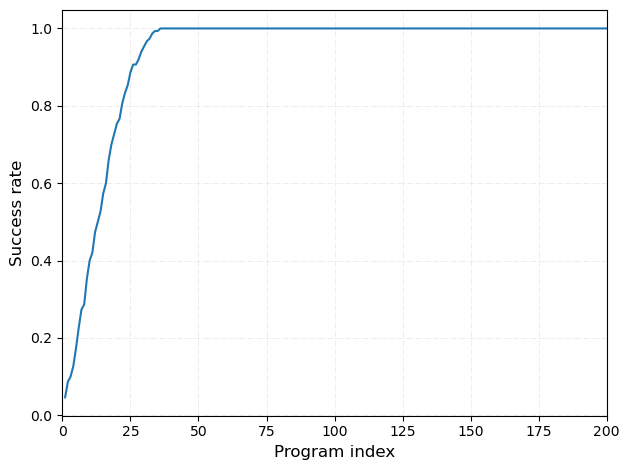

In [7]:
import numpy as np, matplotlib.pyplot as plt
xmax = pbs.MAX_SAMPLES
x = np.arange(1, xmax + 1)
succ = np.array(success_indices, dtype=int)
rate = np.array([(succ <= k).sum() for k in x]) / max(len(results), 1)

plt.figure()
plt.plot(x, rate)
plt.xlabel("Program index", fontsize=12)
plt.ylabel("Success rate", fontsize=12)
plt.xlim(0, xmax)
plt.grid(True, color="#CCCCCC", linewidth=0.6, linestyle='-.', alpha=0.4)
plt.tight_layout()
plt.show()



In [8]:
pbs.expr_to_str.cache_clear()
pbs.closeness_cached.cache_clear()
pbs._apply_primitive_cached.cache_clear()
pbs._ctx_cache.clear(); pbs._cursor_cache.clear()
